https://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm

https://www.itl.nist.gov/div898/handbook/eda/section3/lagplot.htm

In [8]:
import numpy as np
import csv
import matplotlib.pyplot as plt

time_f=[]

with open('lag_data.txt', 'r+',) as lg:
    time_f=[float(_.replace('\n', '')) for _ in lg.readlines()]
    
lag_f =[]
with open('lag_file.txt', 'r+') as lg:
    lag_f =[[ float(x['lag']), float(x['autocorrelation'])] for x in  csv.DictReader(lg)]


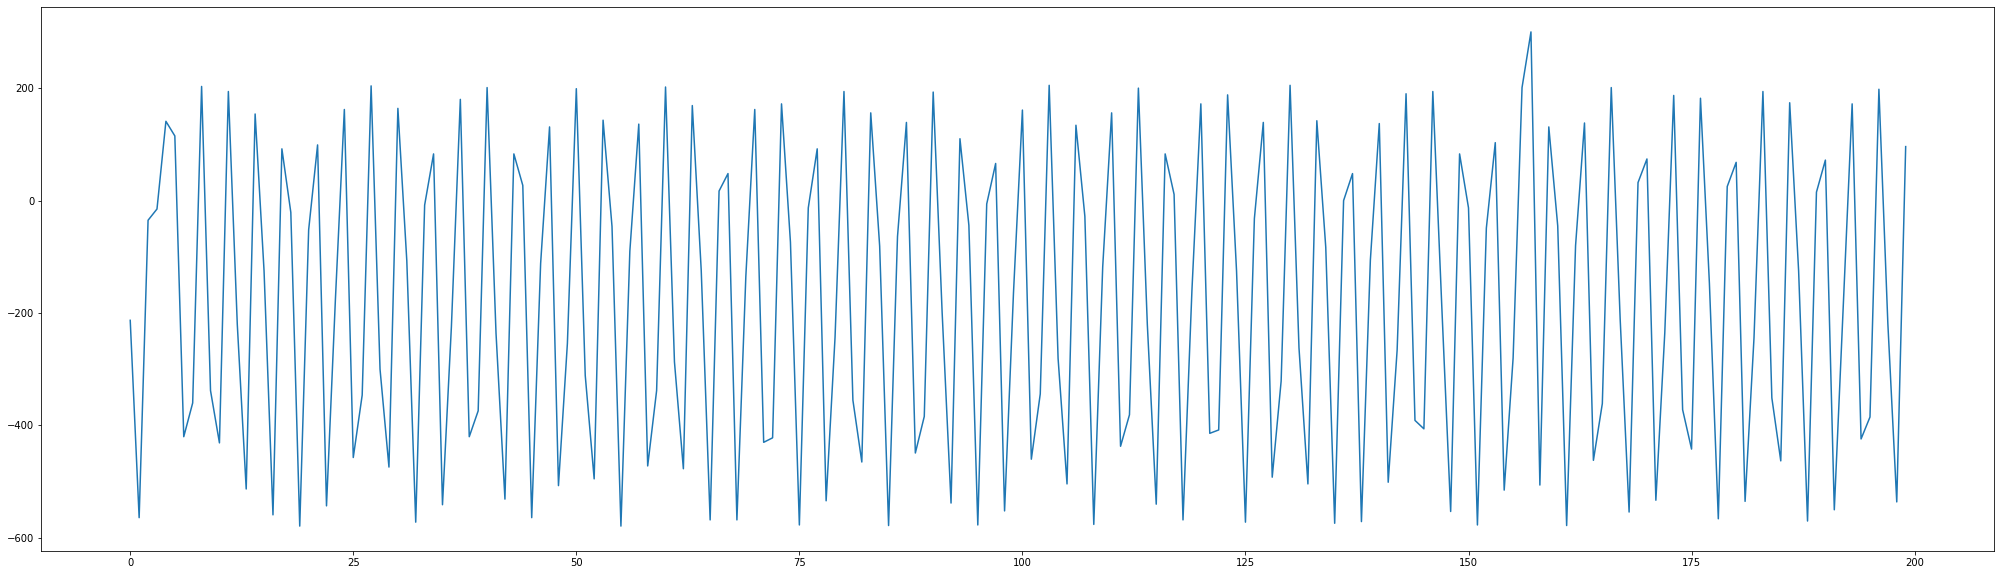

In [9]:
plt.figure(figsize =(35, 10))
plt.plot(np.array(time_f))
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
def ACF(y, k):
    multiply = lambda a, b : a*b
    y_avg = np.mean(y)
    N= y.size
    acfList1 = []
    for i in range(1, N-k):
        xi = np.roll(y, i) - y_avg
        xi_plus_k = np.roll(y, i+k) - y_avg
        j = list(map(multiply,  xi, xi_plus_k))
        acfList1.append(sum(j))

    acfList2 = []
    for i in range(1, N):
        xi = np.roll(y, i) - y_avg
        j = list(map(multiply, xi, xi))
        acfList2.append(sum(j) )


    return sum(acfList1)/sum(acfList2)

In [11]:
plt.figure(figsize =(35, 10))
X = np.array(lag_f)[: , 0]
Y = np.array(lag_f)[: , 1]

subtraction = lambda a, b: a-b
Deviation = list(map(subtraction,  [ACF(np.array(time_f), i) for i in range(0, 50)]  , Y.tolist()  ))


plt.plot([ACF(np.array(time_f), i) for i in range(0, 50)] , c='g')
plt.plot( X, Y, c='r')
plt.plot(Deviation, 'b')
plt.show()

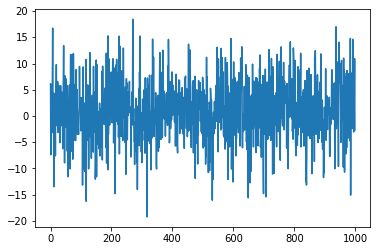

In [12]:
signal =np.sin(2*np.pi/180 * np.arange(0, 1000))
r = signal +np.random.normal(1.2, 5.9, 1000)
plt.plot(r)

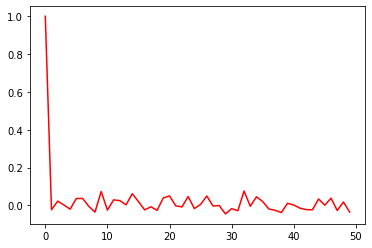

In [13]:
plt.plot([ACF(r, i) for i in range(0, 50)], c='r')
plt.show()

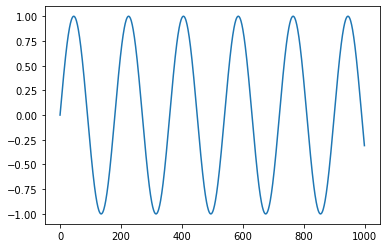

In [14]:
plt.plot(signal)

In [ ]:
plt.plot([ACF(signal, i) for i in range(0, 500)], c='r')
plt.show()